<a href="https://colab.research.google.com/github/DariaMatvienko/FLab/blob/main/TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1
Построить модель линейной регрессии.

* линейная модель
* полином второй степени
* полином третьей степени
* экспонента   

Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки.

Посчитать MSE для каждого случая  
Выбрать наилучший вариант (без тестовой выборки)  
Для решения можете использовать np.linalg.lstsq, np.polyfit, np.poly1d, scipy.stats.linregress, scipy.optimize.curve_fit, sklearn.linear_model.LinearRegression, statsmodels, np.linalg.solve (аналитически) или с помощью стохастического градиентного спуска (написать самостоятельно).

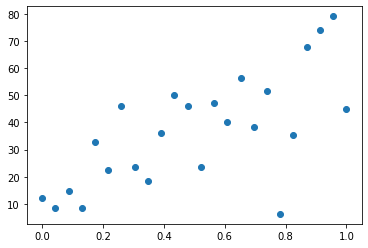

In [9]:
import numpy as np
import matplotlib.pyplot as plt
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)
plt.scatter(x, y);

In [10]:
from sklearn.metrics import mean_squared_error
import pandas as pd
def MSE(name, y, F):
  mse=mean_squared_error(y, F)
  results_df = pd.DataFrame(data=[[name, mse]], 
                            columns=['Model', 'MSE'])
  return results_df
results=pd.DataFrame()

Линейная модель:$$y (x) = w_{0}+w_{1}x$$

$$\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 &amp; x_{1}\\
1 &amp; x_{2}\\
. &amp; \\
1 &amp; x_{N}\\
\end{vmatrix}
\begin{vmatrix}
w_{0} \\
w_{1} \\
\end{vmatrix}
\end{equation*}$$

In [11]:
X1 = list(zip(np.ones(24), x))
W1 = np.linalg.lstsq(X1, y, rcond=None)[0]
W1

array([13.63803333, 46.5106    ])

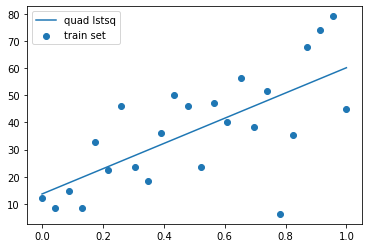

In [12]:
def f(x, w): 
    return w[0] + w[1]*x
results= results.append(MSE('Линейная модель',y,f(x, W1)), ignore_index=True)
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W1), label='quad lstsq')
plt.legend();

Полином второй степени:$$y (x) = w_{0}+w_{1}x +w_{2}x^2$$

$$\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 &amp; x_{1} &amp; x_{1}^{2}\\
1 &amp; x_{2} &amp; x_{2}^{2}\\
. &amp; . &amp; .\\
1 &amp; x_{N} &amp; x_{N}^{2}\\
\end{vmatrix}
\begin{vmatrix}
w_{0} \\
w_{1} \\
w_{2}
\end{vmatrix}
\end{equation*}$$

In [13]:
X2 = list(zip(np.ones(24), x, x*x))
W2 = np.linalg.lstsq(X2, y, rcond=None)[0]
W2

array([12.1867    , 55.61441818, -9.10381818])

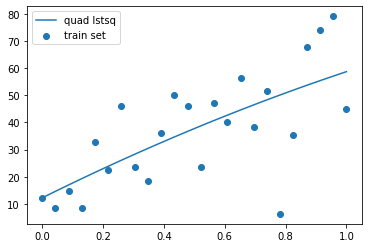

In [14]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x
f(x, W2)
results= results.append(MSE('Полином второй степени',y,f(x, W2)), ignore_index=True)
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W2), label='quad lstsq')
plt.legend();

Пример решения для полинома третьей степени:$$y (x) = w_{0}+w_{1}x +w_{2}x^2+w_{3}x^3$$

$$\begin{equation*}
\begin{vmatrix}
y_{1} \\
y_{2} \\
. \\
y_{N} \\
\end{vmatrix}=
\begin{vmatrix}
1 &amp; x_{1} &amp; x_{1}^{2} &amp; x_{1}^{3}\\
1 &amp; x_{2} &amp; x_{2}^{2} &amp; x_{2}^{3}\\
. &amp; . &amp; . &amp; .\\
1 &amp; x_{N} &amp; x_{N}^{2} &amp; x_{N}^{3}\\
\end{vmatrix}
\begin{vmatrix}
w_{0} \\
w_{1} \\
w_{2} \\
w_{3}
\end{vmatrix}
\end{equation*}$$

In [15]:
X3 = list(zip(np.ones(24), x, x*x, x*x*x))
W3 = np.linalg.lstsq(X3, y, rcond=None)[0]
W3

array([   5.65033333,  143.52996465, -233.63225758,  149.68562626])

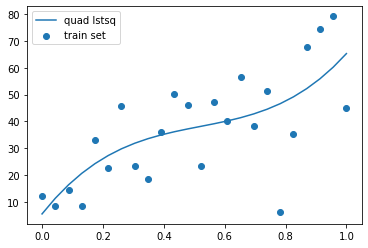

In [16]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x*x*x
results= results.append(MSE('Полином третьей степени',y,f(x, W3)), ignore_index=True)
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W3), label='quad lstsq')
plt.legend();

Экспонента:$$y (x) = w_{0}*e^{w_{1}*x}$$

In [17]:
import scipy
WE=scipy.optimize.curve_fit(lambda o,w0,w1: w0*np.exp(w1*o),x,y)
WE[0]

array([18.85349808,  1.21736709])

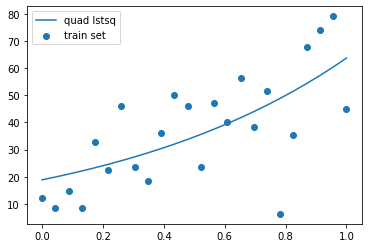

In [18]:
def f(x, w): 
  return w[0]*np.exp(w[1]*x)
results= results.append(MSE('Экспонента',y,f(x,WE[0])), ignore_index=True)
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, WE[0]), label='quad lstsq')
plt.legend();

MSE

In [19]:
results

,Model,MSE
0,Линейная модель,213.134699
1,Полином второй степени,212.593537
2,Полином третьей степени,202.513037
3,Экспонента,220.064184


На основании таблицы выходных значений коэффициента среднеквадратичных ошибок - MSE - можно сделать вывод, что наиболее точно значения тренировочной выборки приближаются к исходным данным у модель полинома третьей степени. Также это можно увидеть и на графике данной модели.

Задача 2  
Данные: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

1) Разделите данные на train/test или используйте кросс-валидацию (можно grid search)

2) Постройте несколько моделей линейной регрессии:

- sklearn.linear_model.LinearRegression
- sklearn.linear_model.Ridge
- sklearn.linear_model.Lasso
- sklearn.linear_model.ElasticNet

Для последних трёх вариантов попробуйте разные значения коэффициента регуляризации.

3) Сравните построенные модели по MSE на тестовой выборке (или через кросс-валидацию)  
Какая модель оказалась наилучшей? Почему?

In [20]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [22]:
def for_models(mod,name):
  RR=pd.DataFrame() 
  model = mod#параметры необходимой модели
  model.fit(X_train, y_train)#преобразование
  pred = model.predict(X_test)#выделение тестовой выборки
  RR=RR.append(MSE(name,y_test, pred),ignore_index=True) #вычисление MSE по функции, написанной в первом задании
  return RR,pred

                   Model          MSE
0  LinearRegression:test  3424.316688


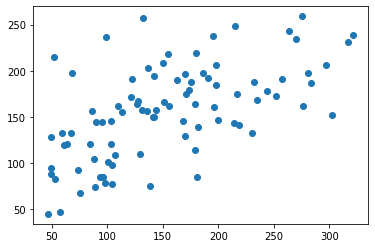

In [23]:
mm,predict=for_models(LinearRegression(normalize=True),'LinearRegression:test')
plt.scatter(y_test, predict)
print(mm)

Проведём эксперимент для нескольких значений коэффициента регресии alpha, построим соответсвующие графики и выведем значения MSE.

In [24]:
alphas=[0.000001,0.01,0.1,0.5,1,5,10,50,100]

        Model          MSE       Alpha
0  Ridge:test  3424.320182    0.000001
0  Ridge:test  3435.844689    0.010000
0  Ridge:test  3372.649628    0.100000
0  Ridge:test  3298.909606    0.500000
0  Ridge:test  3379.423965    1.000000
0  Ridge:test  4040.224556    5.000000
0  Ridge:test  4404.707830   10.000000
0  Ridge:test  4937.256803   50.000000
0  Ridge:test  5031.550750  100.000000


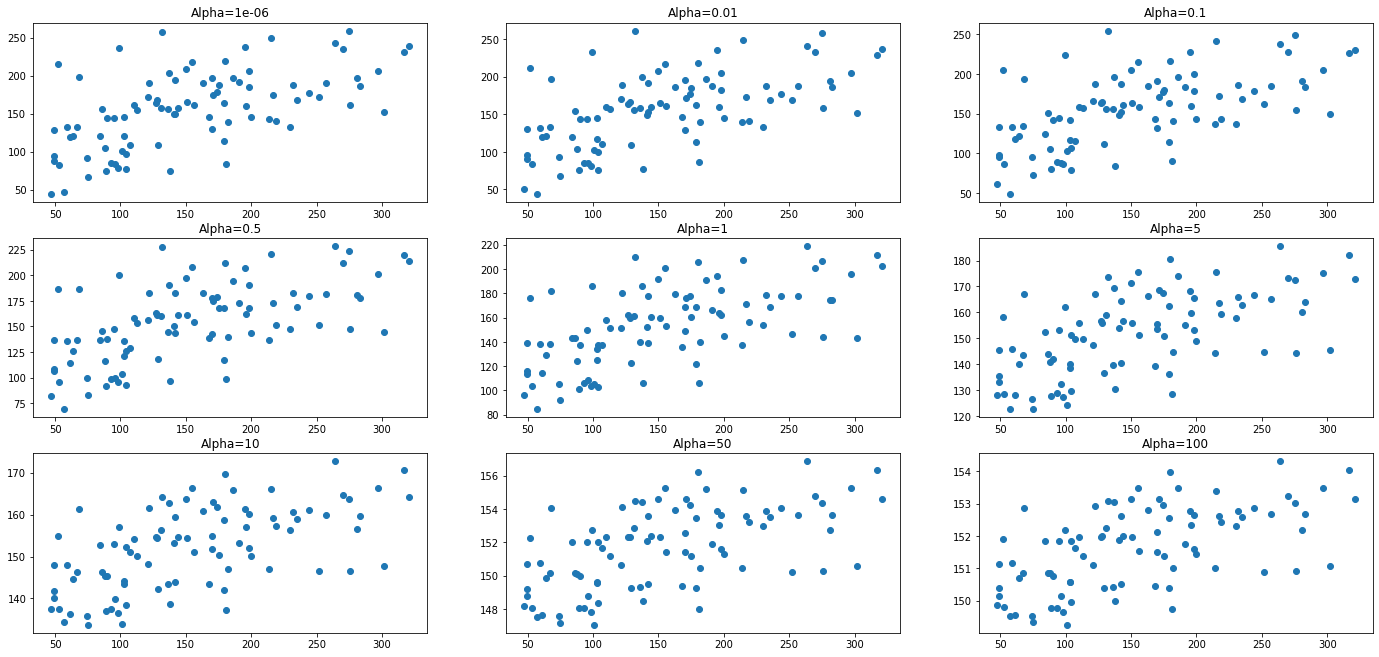

In [25]:
R=pd.DataFrame()
plt.figure(figsize=(24,35))
m=0
for a in alphas:
  r,Pred=for_models(Ridge(alpha=a,solver='cholesky', tol=0.0001, random_state=42),'Ridge:test')
  R=R.append(r)
  m+=1
  plt.subplot(len(alphas),3,m)
  plt.scatter(y_test, Pred)
  plt.title('Alpha='+str(a))
R['Alpha']=alphas
print(R)

        Model          MSE       Alpha
0  Lasso:test  3402.399691    0.000001
0  Lasso:test  3401.776875    0.010000
0  Lasso:test  3401.766969    0.100000
0  Lasso:test  3502.710073    0.500000
0  Lasso:test  3787.656273    1.000000
0  Lasso:test  5134.783503    5.000000
0  Lasso:test  5134.783503   10.000000
0  Lasso:test  5134.783503   50.000000
0  Lasso:test  5134.783503  100.000000


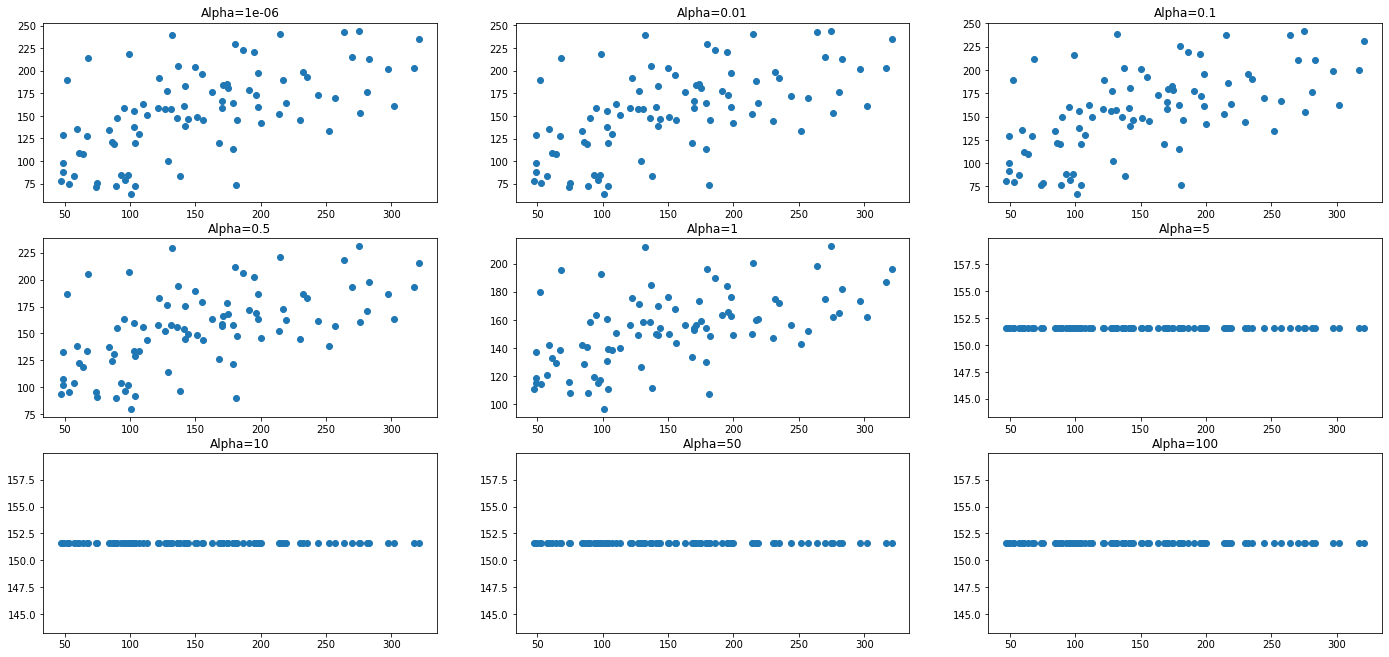

In [ ]:
R=pd.DataFrame()
plt.figure(figsize=(24,35))
m=0
for a in alphas:
  r,Pred=for_models(Lasso(alpha=a, precompute=True, warm_start=True, positive=True, selection='random', random_state=42),'Lasso:test')
  R=R.append(r)
  m+=1
  plt.subplot(len(alphas),3,m)
  plt.scatter(y_test, Pred)
  plt.title('Alpha='+str(a))
R['Alpha']=alphas
print(R)

Функция становится постоянной при alpha~2.31273.

             Model          MSE       Alpha
0  ElasticNet:test  3402.271102    0.000001
0  ElasticNet:test  3583.883977    0.010000
0  ElasticNet:test  4701.180260    0.100000
0  ElasticNet:test  5045.242412    0.500000
0  ElasticNet:test  5097.504520    1.000000
0  ElasticNet:test  5134.783503    5.000000
0  ElasticNet:test  5134.783503   10.000000
0  ElasticNet:test  5134.783503   50.000000
0  ElasticNet:test  5134.783503  100.000000


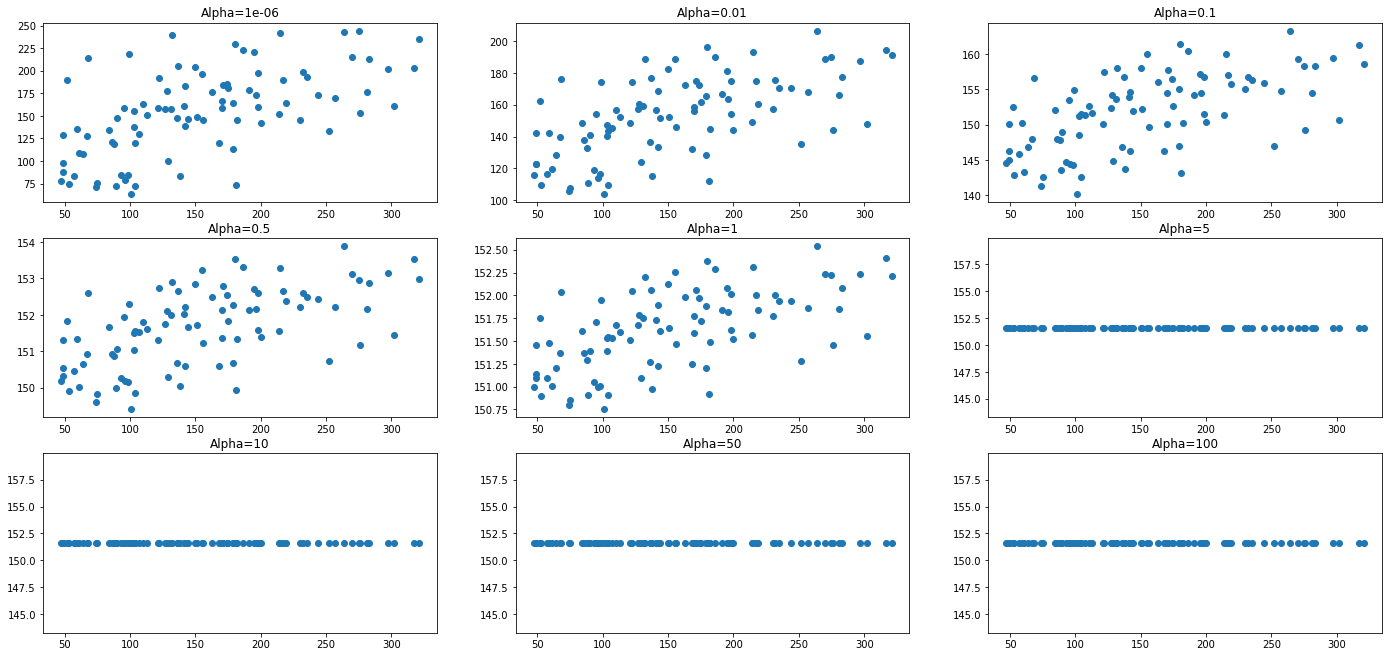

In [ ]:
R=pd.DataFrame()
plt.figure(figsize=(24,35))
m=0
for a in alphas:
  r,Pred=for_models(ElasticNet(alpha=a, precompute=True, warm_start=True, positive=True, selection='random', random_state=42),'ElasticNet:test')
  R=R.append(r)
  m+=1
  plt.subplot(len(alphas),3,m)
  plt.scatter(y_test, Pred)
  plt.title('Alpha='+str(a))
R['Alpha']=alphas
print(R)

Функция становится постоянной при alpha~4.62547.

Заметно, что когда alpha>=5 предсказанные значения сходятся к одному - 151.60623229, т.е. мы получаем постоянную функцию.  

Минимальное среднее квадратическое различие между оценочными значениями и истинным у модели регрессии ElasticNet. Эта модель соединяет в себе две - гребневую (Ridge) и Lasso. Происходит объединение двух терминов регуляризации: суммы значений коэффициентов (L1) и суммы квадратов значений коэффициентов (L2). ElasticNet уменьшает коэффициенты плохих предикторов, а не отбрасывает их, как это делает Lasso. Модель ElasticNet не так сильно зависит от корреляции значений из набора данных, что является существенным показателем для Lasso, и берёт наиболее релевантные признаки. Таким образом, можно сказать,что в ElasticNet выполняются функции Lasso с выбором группы объектов Ridge.